In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import (
    accuracy_score,
    roc_curve, 
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

import math

In [2]:
data = pd.read_csv("telco.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data = data.drop(columns="customerID")

In [11]:
categorical_column = data.select_dtypes(include=['object']).columns.tolist()
categorical_column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

<Axes: xlabel='PaymentMethod', ylabel='count'>

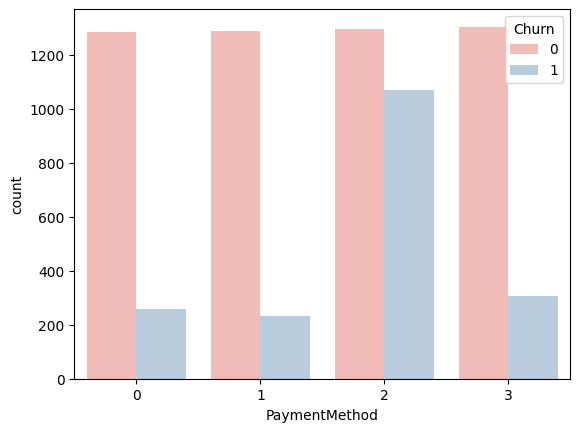

In [46]:
sns.countplot(
    data = data, 
    x = 'PaymentMethod',
    hue = 'Churn'
)

In [12]:
encoders = {}

for col in categorical_column:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [13]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


Split data into train and test data

In [14]:
X = data.drop(columns='Churn')
y = data.iloc[:,-1]

In [15]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [16]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Split into 70% and 30% ratio

In [17]:
X_train, X_test, y_train, y_test = train_test_split(

    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [18]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,6440
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1819
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2659
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,370


In [19]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,2044
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,6522
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,67
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,5822
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,3716
315,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,4697
2439,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,2856
5002,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2556


In [20]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [21]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

1. Logistic Regression

In [22]:
def logistic_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model = LogisticRegression(max_iter = 8000)
    LR = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_train, y_train)
    cm_LR = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    display = ConfusionMatrixDisplay(
    confusion_matrix = cm_LR,
    display_labels = [0,1]
)


    return {
        print("Model: ", LR),
        print("Score of Model" ,score*100),
        print("Confusion Matrix:", cm_LR),
        print("AUC Score: ", auc_score*100),
        display.plot(),
        plt.title("Confusion Matrix for the Logistic Regression"),
        plt.tight_layout(),
        plt.show()
        
    }

Model:  LogisticRegression(max_iter=8000)
Score of Model 80.42243521476749
Confusion Matrix: [[940  96]
 [163 210]]
AUC Score:  73.51692941505273


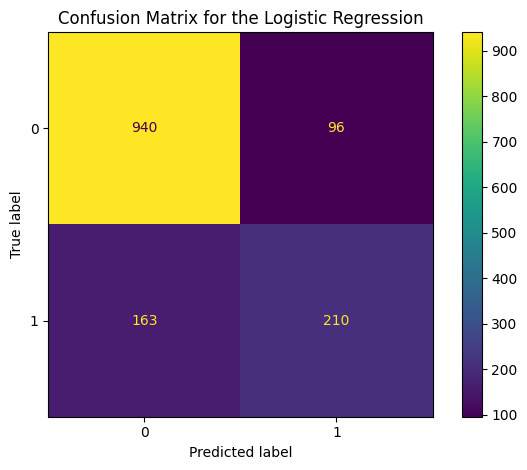

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28f93d38440>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the Logistic Regression')}

In [23]:
logistic_reg(X = data.drop(columns='Churn'), y = data.iloc[:,-1])

Decision Tree

In [24]:
def decision_tree_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': range(1, 11),
            'max_features': ['sqrt', 'log2']
        }
    model = DecisionTreeClassifier(random_state=42)
    cv = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy')
    cv.fit(X_train, y_train)
    best_model = DecisionTreeClassifier(**cv.best_params_, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    cc = classification_report(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Not Churn','Churn'])

    return {
                print("Model: ", best_model),
                print("Score of Model" ,acc*100),
                print("Confusion Matrix:", cm),
                print("AUC Score: ", auc_score*100),
                print("Classification Report:",cc),
                display.plot(),
                plt.title("Confusion Matrix for the Decision tree"),
                plt.tight_layout(),
                plt.show()
    }

    # plt.figure(figsize=(18, 10))
    # tree.plot_tree(best_model,filled=True,feature_names=X.columns,class_names=True)
    # plt.show()




Model:  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       random_state=42)
Score of Model 78.92122072391767
Confusion Matrix: [[910 126]
 [171 202]]
AUC Score:  70.99666690819507
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.54      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



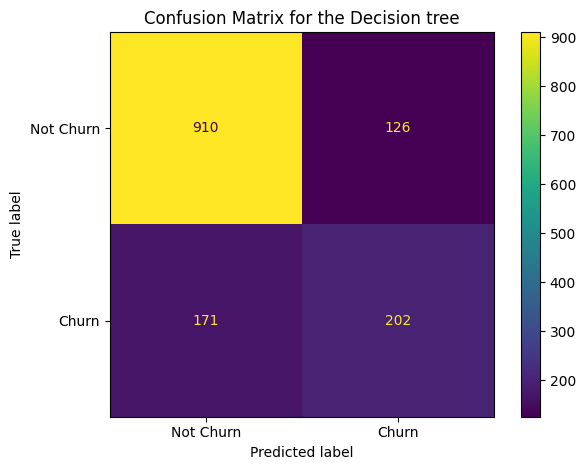

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28f93dcd090>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the Decision tree')}

In [25]:
decision_tree_reg(X = data.drop(columns='Churn'), y = data.iloc[:,-1])

Random Forest

In [26]:
def randomforest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['sqrt', 'log2']
        }
    model = RandomForestClassifier(random_state=42)
    cv = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy')
    cv.fit(X_train, y_train)
    best_model = RandomForestClassifier(**cv.best_params_, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    cc = classification_report(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Not Churn','Churn'])

    return {
                print("Model: ", best_model),
                print("Score of Model" ,acc*100),
                print("Confusion Matrix:", cm),
                print("AUC Score: ", auc_score*100),
                print("Classification Report:",cc),
                display.plot(),
                plt.title("Confusion Matrix for the Random Forest"),
                plt.tight_layout(),
                plt.show()
    }




Model:  RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)
Score of Model 80.69552874378992
Confusion Matrix: [[944  92]
 [180 193]]
AUC Score:  71.43115923276781
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



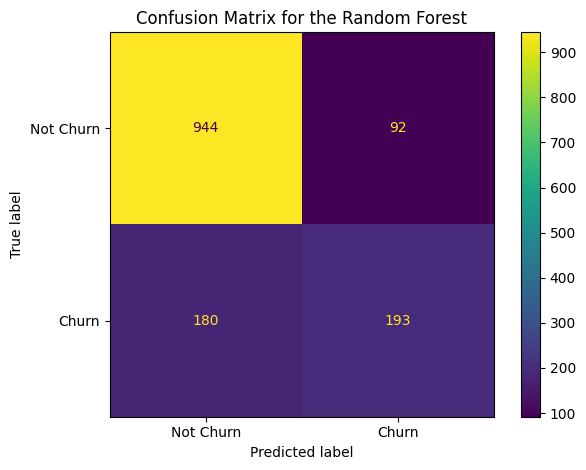

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28f95f7ae90>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the Random Forest')}

In [27]:
randomforest(X = data.drop(columns='Churn'), y = data.iloc[:,-1])

XGBoost

In [28]:
def xgboost(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    XG = XGBClassifier()
    model = XG.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    cc = classification_report(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Not Churn','Churn'])

    return {
                print("Model: ", model),
                print("Score of Model" ,acc*100),
                print("Confusion Matrix:", cm),
                print("AUC Score: ", auc_score*100),
                print("Classification Report:",cc),
                display.plot(),
                plt.title("Confusion Matrix for the XGBoost"),
                plt.tight_layout(),
                plt.show()
    }

Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Score of Model 78.56635911994321
Confusion Matrix: [[909 127]
 [175 198]]
AUC Score:  70.41221133044189
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86      

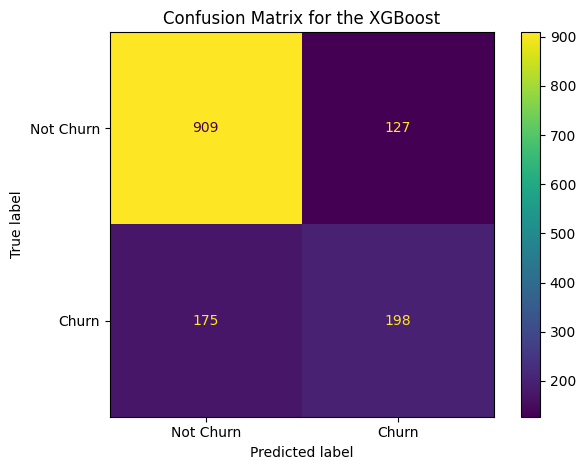

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28f93e13e10>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the XGBoost')}

In [29]:
xgboost(X = data.drop(columns='Churn'), y = data.iloc[:,-1])

Gradient Boost

In [ ]:
def gradientboost(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    GB = GradientBoostingClassifier()
    model = GB.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    cc = classification_report(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Not Churn','Churn'])

    return {
                print("Model: ", model),
                print("Score of Model:" ,acc*100),
                print("Confusion Matrix: \n", cm),
                print("AUC Score:", auc_score*100),
                print("Classification Report:",cc),
                display.plot(), 
                plt.title("Confusion Matrix for the Gradient Boosting"),
                plt.tight_layout(),
                plt.show()
    }

Model:  GradientBoostingClassifier()
Score of Model 81.12136266855926
Confusion Matrix: [[945  91]
 [175 198]]
AUC Score:  72.14966306789363
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



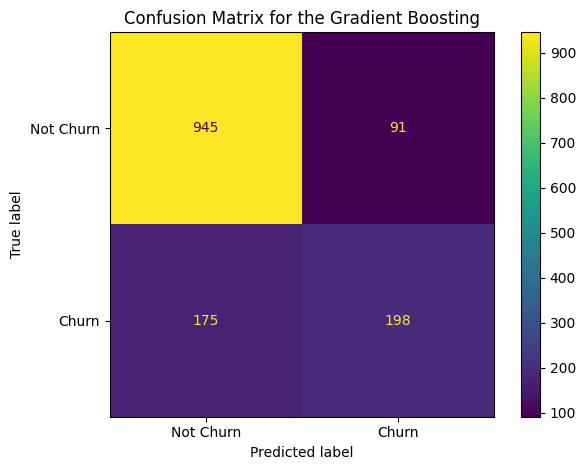

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28ff86dcb00>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the Gradient Boosting')}

In [ ]:
gradientboost(X = data.drop(columns='Churn'), y = data.iloc[:,-1])

In [47]:
def Adaboost(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    AB = AdaBoostClassifier()
    model = AB.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    cc = classification_report(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Not Churn','Churn'])

    return {
                print("Model: ", model),
                print("Score of Model" ,acc*100),
                print("Confusion Matrix:", cm),
                print("AUC Score: ", auc_score*100),
                print("Classification Report:",cc),
                display.plot(), 
                plt.title("Confusion Matrix for the AdaBoosting"),
                plt.tight_layout(),
                plt.show()
    }

Model:  AdaBoostClassifier()
Score of Model 80.76650106458482
Confusion Matrix: [[930 106]
 [165 208]]
AUC Score:  72.76620741768194
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



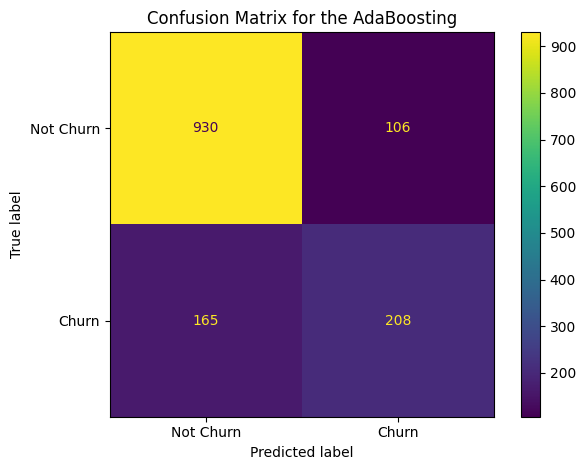

{<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28ff8781ae0>,
 None,
 Text(0.5, 1.0, 'Confusion Matrix for the AdaBoosting')}

In [48]:
Adaboost(X = data.drop(columns='Churn'), y = data.iloc[:,-1])